Just creating a sample dataset for software to work with based on what we discussed on the 5th of March re. signal processing pipeline.

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

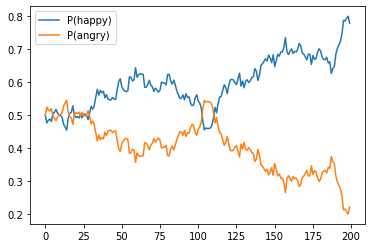

In [33]:
#this is code I have from a previous project, it just creates some nice noise
def UO(steps):
    N = steps   #time steps
    kappa = 0.3 #mean revision constant
    theta = 0.5 #long term mean
    sigma = 0.5 #volatility constant (how much noise there is?)

    dt = 0.001

    X= np.zeros(N)
    X[0] = 0.5

    W = stats.norm.rvs(loc=0, scale=1, size=(N - 1, 1)) #W is the Wiener process, I think this is just the actual random noise

    std_dt = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
    for t in range(0, N - 1):
        X[t + 1] = theta + np.exp(-kappa * dt) * (X[t] - theta) + std_dt * W[t]
    return X

data = np.zeros((200,2))

data[:,0] = UO(200)
data[:,1] = 1 - data[:,0]

plt.plot(data[:,0],label="P(happy)")
plt.plot(data[:,1],label="P(angry)")
plt.legend()

In [35]:
np.savetxt("sample4software.csv", data, delimiter=",")